<a href="https://colab.research.google.com/github/programmermahi/Machine-Learning-Lab/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.datasets import load_iris
iris = load_iris ()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nFirst 10 rows of X:\n", X[:10])


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 10 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 1.00


In [11]:
# Select features: sepal length (0) and petal width (3)
X_2d = iris.data[:, [0, 3]]

# Split data
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Train model
model_2d = LogisticRegression(max_iter=200)
model_2d.fit(X_train_2d, y_train_2d)

# Predict and evaluate
y_pred_2d = model_2d.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test_2d, y_pred_2d)
print(f"Test Accuracy (Sepal Length vs Petal Width): {accuracy_2d:.2f}")

Test Accuracy (Sepal Length vs Petal Width): 1.00


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Evaluate clustering
ari = adjusted_rand_score(y, clusters)
silhouette = silhouette_score(X, clusters)

print(f"Adjusted Rand Index: {ari:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")

Adjusted Rand Index: 0.72
Silhouette Score: 0.55


=== K-Means with k=3 ===
Adjusted Rand Index: 0.620
Silhouette Score: 0.460
Homogeneity Score: 0.659


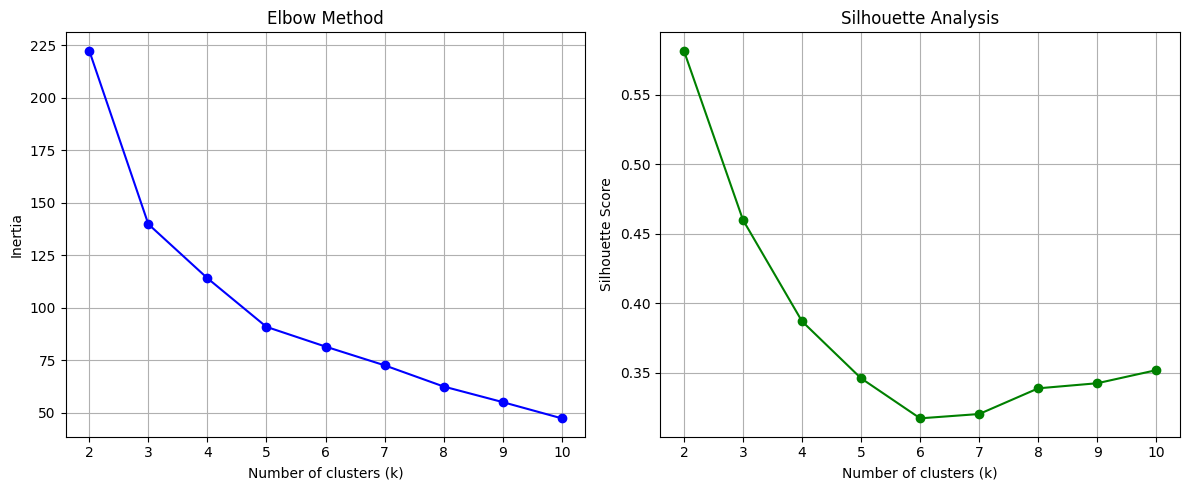


Optimal number of clusters (k): 2

=== K-Means with Optimal k=2 ===
Adjusted Rand Index: 0.568
Silhouette Score: 0.582
Homogeneity Score: 0.579


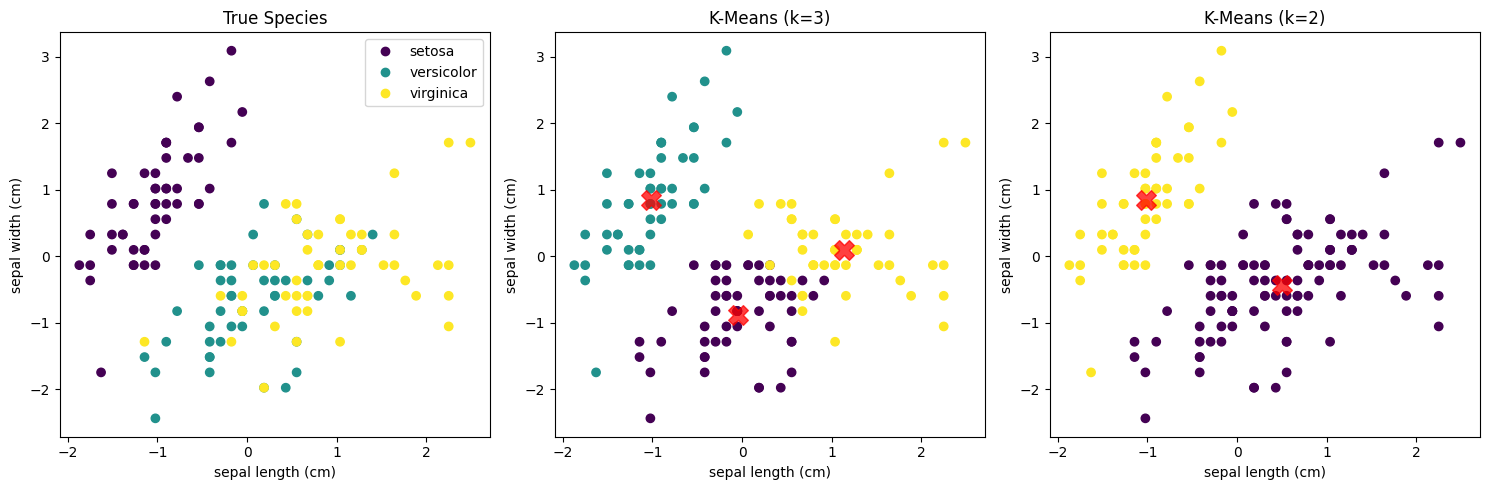

<Figure size 1500x1000 with 0 Axes>

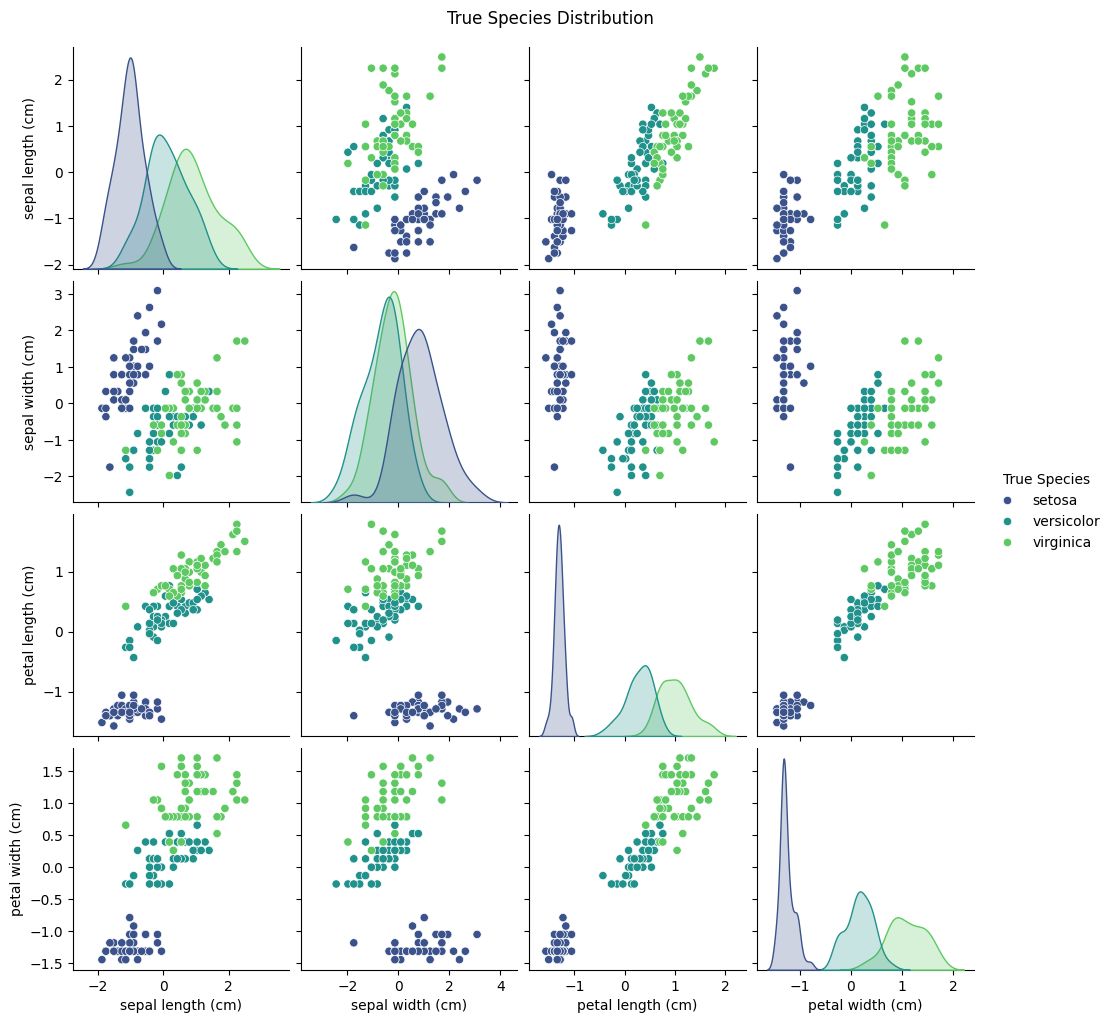

<Figure size 1500x1000 with 0 Axes>

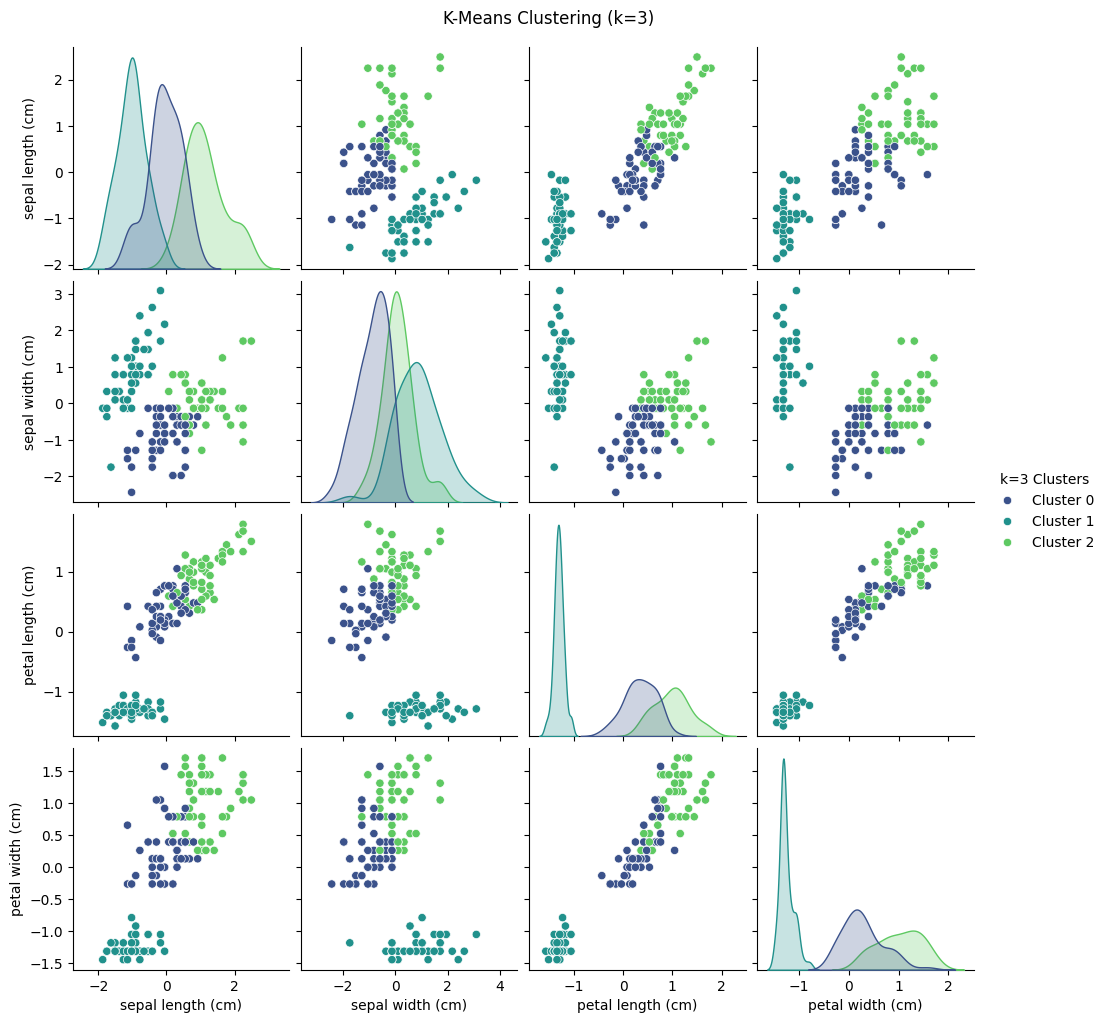

<Figure size 1500x1000 with 0 Axes>

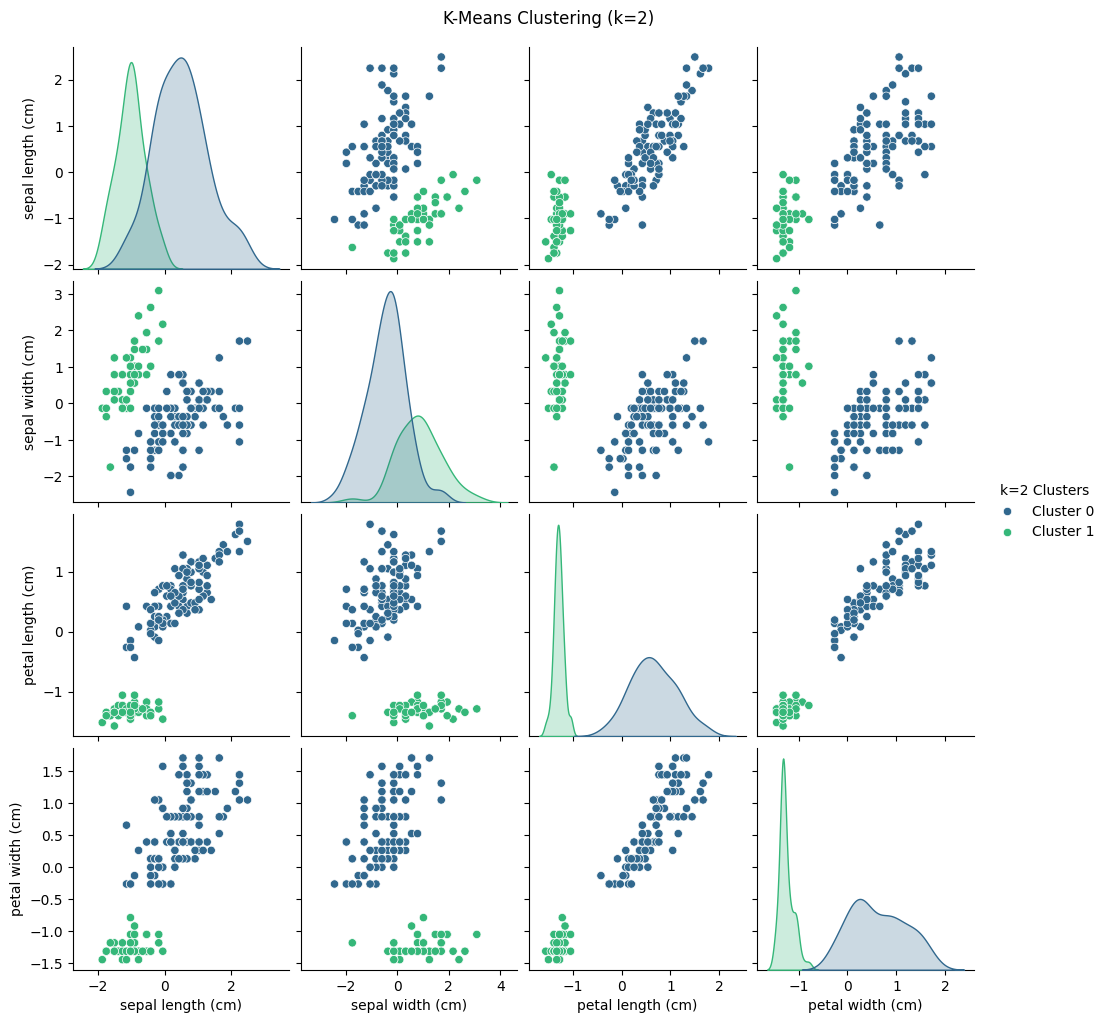

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load and prepare the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Basic K-Means with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_3 = kmeans_3.fit_predict(X_scaled)

# Evaluate clustering performance
ari_3 = adjusted_rand_score(y, clusters_3)
silhouette_3 = silhouette_score(X_scaled, clusters_3)
homogeneity_3 = homogeneity_score(y, clusters_3)

print("=== K-Means with k=3 ===")
print(f"Adjusted Rand Index: {ari_3:.3f}")
print(f"Silhouette Score: {silhouette_3:.3f}")
print(f"Homogeneity Score: {homogeneity_3:.3f}")

# 2. Determine optimal k using Elbow Method and Silhouette Analysis
inertias = []
silhouettes = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, clusters))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

# Plot Silhouette Analysis
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)

plt.tight_layout()
plt.show()

# Find optimal k
optimal_k = np.argmax(silhouettes) + 2  # +2 because range starts at 2
print(f"\nOptimal number of clusters (k): {optimal_k}")

# 3. K-Means with optimal k
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_opt = kmeans_opt.fit_predict(X_scaled)

# Evaluate optimal clustering
ari_opt = adjusted_rand_score(y, clusters_opt)
silhouette_opt = silhouette_score(X_scaled, clusters_opt)
homogeneity_opt = homogeneity_score(y, clusters_opt)

print(f"\n=== K-Means with Optimal k={optimal_k} ===")
print(f"Adjusted Rand Index: {ari_opt:.3f}")
print(f"Silhouette Score: {silhouette_opt:.3f}")
print(f"Homogeneity Score: {homogeneity_opt:.3f}")

# 4. Visualization of clustering results
plt.figure(figsize=(15, 5))

# Plot 1: True labels
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('True Species')
plt.legend(handles=scatter.legend_elements()[0], labels=target_names.tolist())

# Plot 2: k=3 clustering
plt.subplot(1, 3, 2)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_3, cmap='viridis')
centers = kmeans_3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-Means (k=3)')

# Plot 3: Optimal k clustering
plt.subplot(1, 3, 3)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_opt, cmap='viridis')
centers = kmeans_opt.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title(f'K-Means (k={optimal_k})')

plt.tight_layout()
plt.show()

# 5. Pairplot for comprehensive visualization
# Create DataFrame for visualization
import pandas as pd
df = pd.DataFrame(X_scaled, columns=feature_names)
df['True Species'] = pd.Categorical.from_codes(y, target_names)
df['k=3 Clusters'] = pd.Categorical.from_codes(clusters_3, ['Cluster 0', 'Cluster 1', 'Cluster 2'])
df[f'k={optimal_k} Clusters'] = pd.Categorical.from_codes(clusters_opt, [f'Cluster {i}' for i in range(optimal_k)])

# Create pairplot
plt.figure(figsize=(15, 10))
sns.pairplot(df, vars=feature_names, hue='True Species', palette='viridis')
plt.suptitle('True Species Distribution', y=1.02)
plt.show()

plt.figure(figsize=(15, 10))
sns.pairplot(df, vars=feature_names, hue='k=3 Clusters', palette='viridis')
plt.suptitle('K-Means Clustering (k=3)', y=1.02)
plt.show()

plt.figure(figsize=(15, 10))
sns.pairplot(df, vars=feature_names, hue=f'k={optimal_k} Clusters', palette='viridis')
plt.suptitle(f'K-Means Clustering (k={optimal_k})', y=1.02)
plt.show()